In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), "scripts/analysis/autoencoders"))

In [2]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools
import convolutional

In [12]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF
from PIL import Image

In [4]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = convolutional.Autoencoder()
model.load_state_dict(state_dict=torch.load("./models/autoencoder.pt"))
model = model.to(device)

In [41]:
def preprocess(img):
    pad_max = 8008
    bg_color = (244,244,244)
    resize_to = (512, 512)
    
    height, width = img.size
    img = TF.pad(img, (pad_max - height,pad_max - width), fill=bg_color)
    img = TF.resize(img, resize_to)
    return TF.to_tensor(img)

In [15]:
dataset = convolutional.HistologyDataset("outdir/split_data/test", preprocess)
dataloader = DataLoader(
    dataset,
    batch_size=1
)

In [43]:
n_examples = 4
examples = []
for img, (img_fp, *_) in itertools.islice(dataloader, n_examples):
    with torch.no_grad():
        img_reconstructed, _ = model(img.to(device))
    img = img.view(512, 512, 3).cpu()
    img_reconstructed = img_reconstructed.view(512,512,3).cpu()
    examples.append((img, img_reconstructed, img_fp))

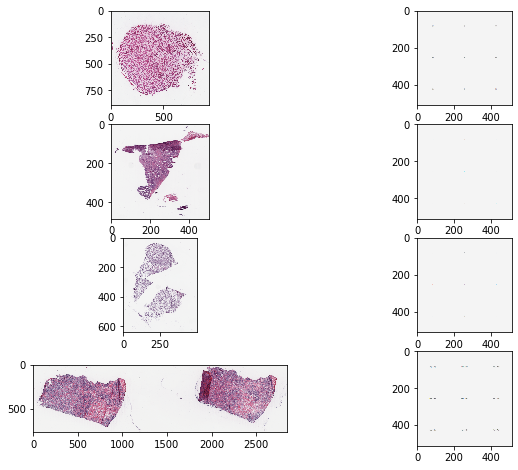

In [46]:
f, axes = plt.subplots(n_examples, 2)
for i, (img, img_reconstructed, fp) in enumerate(itertools.islice(examples, n_examples)):
    img_orig = Image.open("outdir/split_data/test/" + fp)
    axes[i, 0].imshow(img_orig)
    axes[i, 1].imshow(preprocess(img_orig).view(512, 512, 3).cpu())
#     axes[i, 2].imshow(img)
#     axes[i, 3].imshow(img_reconstructed)
    
f.set_size_inches(2.5*n_examples, 8)